In [180]:
!pip install seaborn
!pip install scikit-learn
!pip install kagglehub
!pip install shap





Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score

import shap
import joblib

In [182]:

df = pd.read_csv("german_credit_risk.csv")

In [183]:
print(df.head(10))
print(df.shape)

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   
5           5   35    male    1    free             NaN              NaN   
6           6   53    male    2     own      quite rich              NaN   
7           7   35    male    3    rent          little         moderate   
8           8   61    male    1     own            rich              NaN   
9           9   28    male    3     own          little         moderate   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   b

In [184]:
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

In [185]:
print(df.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [186]:
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [187]:
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})

In [188]:

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

    print(f"\nColumn: {col}")
    print("Original categories:", encoder.classes_)
    print("Encoded values:", encoder.transform(encoder.classes_))
    print("-" * 50)




Column: Sex
Original categories: ['female' 'male']
Encoded values: [0 1]
--------------------------------------------------

Column: Housing
Original categories: ['free' 'own' 'rent']
Encoded values: [0 1 2]
--------------------------------------------------

Column: Saving accounts
Original categories: ['little' 'moderate' 'quite rich' 'rich' nan]
Encoded values: [0 1 2 3 4]
--------------------------------------------------

Column: Checking account
Original categories: ['little' 'moderate' 'rich' nan]
Encoded values: [0 1 2 3]
--------------------------------------------------

Column: Purpose
Original categories: ['business' 'car' 'domestic appliances' 'education' 'furniture/equipment'
 'radio/TV' 'repairs' 'vacation/others']
Encoded values: [0 1 2 3 4 5 6 7]
--------------------------------------------------


In [189]:
print(df.head())
print(df.shape)

   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                4                 0           1169   
1   22    0    2        1                0                 1           5951   
2   49    1    1        1                0                 3           2096   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   

   Duration  Purpose  Risk  
0         6        5     1  
1        48        5     0  
2        12        3     1  
3        42        4     1  
4        24        1     0  
(1000, 10)


In [190]:
X = df.drop("Risk", axis=1)
y = df["Risk"]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [194]:
print("\n Evaluating Individual Models:")
model_predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    model_predictions[name] = y_pred


 Evaluating Individual Models:

 Logistic Regression
Accuracy: 0.755
Precision: 0.7771084337349398
Recall: 0.9148936170212766
F1-Score: 0.8403908794788274
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.37      0.47        59
           1       0.78      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.74      0.76      0.73       200

Confusion Matrix:
 [[ 22  37]
 [ 12 129]]

 Random Forest
Accuracy: 0.765
Precision: 0.7901234567901234
Recall: 0.9078014184397163
F1-Score: 0.8448844884488449
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.42      0.52        59
           1       0.79      0.91      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77    

In [195]:
ensemble = VotingClassifier(
    estimators=[
        ('lr', models["Logistic Regression"]),
        ('svm', models["SVM"]),
        ('rf', models["Random Forest"]),
        ('gb', models["Gradient Boosting"])
    ],
    voting='soft'
)

In [196]:
ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)

In [197]:
print("\nEnsemble Model (VotingClassifier)")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1-Score:", f1_score(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))


Ensemble Model (VotingClassifier)
Accuracy: 0.77
Precision: 0.7777777777777778
Recall: 0.9432624113475178
F1-Score: 0.8525641025641025
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.36      0.48        59
           1       0.78      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.75      0.65      0.66       200
weighted avg       0.76      0.77      0.74       200

Confusion Matrix:
 [[ 21  38]
 [  8 133]]



 SHAP Summary


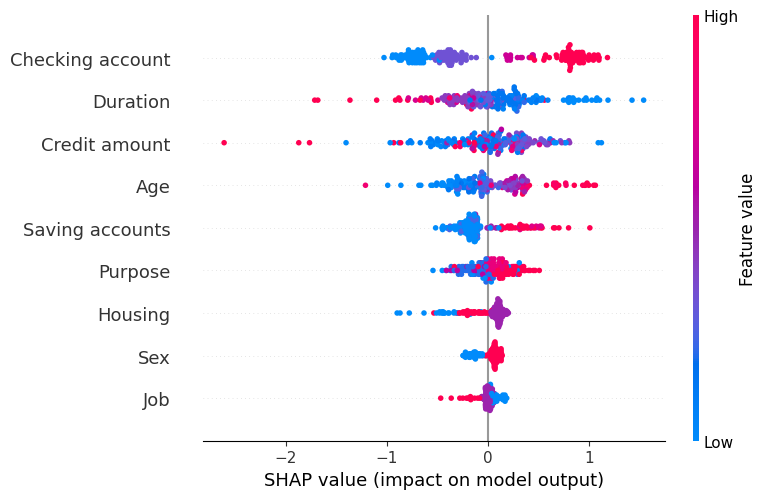

In [201]:
print("\n SHAP Summary")
explainer = shap.Explainer(models["Gradient Boosting"], X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
joblib.dump(ensemble, 'credit_ensemble_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['train.pkl']